# Part 14

# Box and violin plots

In [1]:
# Import all the usual stuff
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1 = randn(100)
data2 = randn(100) + 2

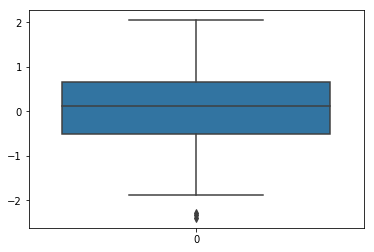

In [3]:
sns.boxplot(data = data1)

### How to interpret a boxplot?

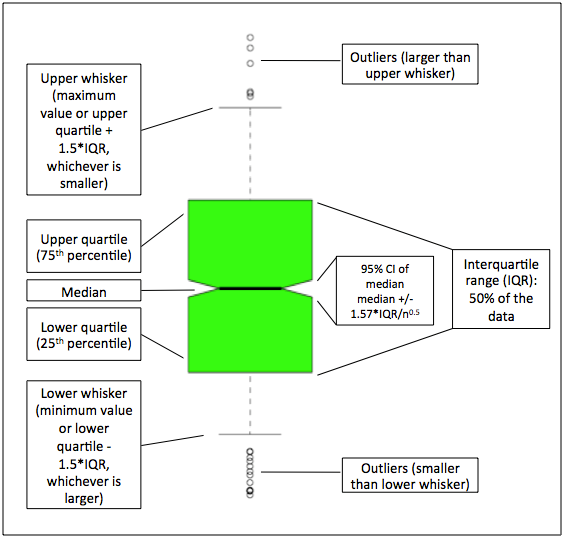

In [6]:
from IPython.display import Image
Image(filename='./images_data_etc/images/boxplot.png',height = 640, width = 480)

(array([ 3.,  4.,  9.,  5., 16., 20., 20., 14.,  6.,  3.]),
 array([-2.39435154, -1.94993833, -1.50552512, -1.06111191, -0.6166987 ,
        -0.17228549,  0.27212772,  0.71654093,  1.16095415,  1.60536736,
         2.04978057]),
 <a list of 10 Patch objects>)

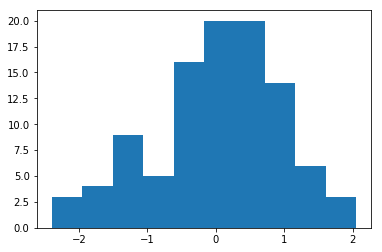

In [4]:
plt.hist(data1)

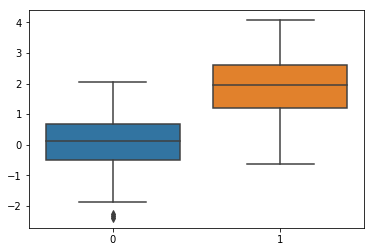

In [5]:
sns.boxplot(data = [data1,data2]) # note the 'data = '; the older version of seaborn does not need this

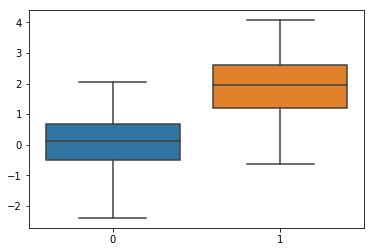

In [6]:
sns.boxplot(data = [data1,data2],whis = np.inf) # set the whisker to 'infinity', effectively including all outliers

**Let us do another example, this time with some real data**

In [7]:
dframe_wine = pd.read_csv("data/redwines.csv")

In [3]:
dframe_wine.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


Let us compare the alcohol content of wines which have quality == 5, those which have quality == 6, and those with quality == 7 using boxplots (grouped boxplot)

In [8]:
x1 = dframe_wine.alcohol[dframe_wine.quality == 5]
x2 = dframe_wine.alcohol[dframe_wine.quality == 6]
x3 = dframe_wine.alcohol[dframe_wine.quality == 7]

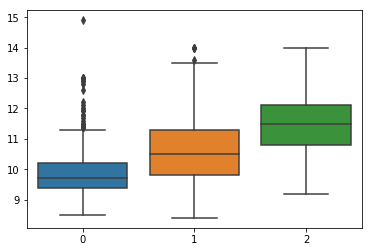

In [5]:
sns.boxplot(data = [x1,x2,x3])

This would be more informative if we added notches to the boxes. While we're at it, let's make the plot a bit bigger

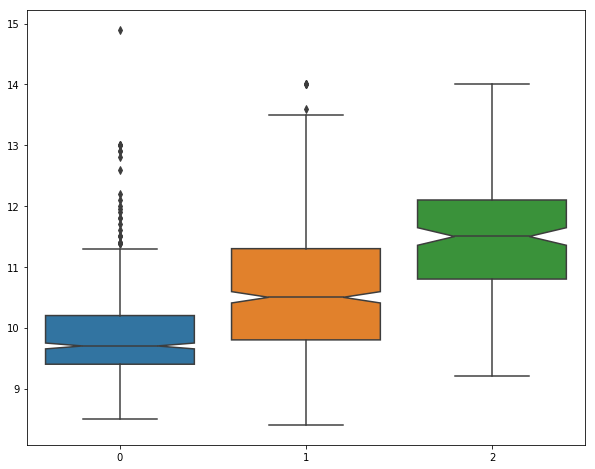

In [9]:
f, axes = plt.subplots(figsize = (10,8))
sns.boxplot(data = [x1,x2,x3], notch = True)

Another example - this time with the familiar *iris* data set

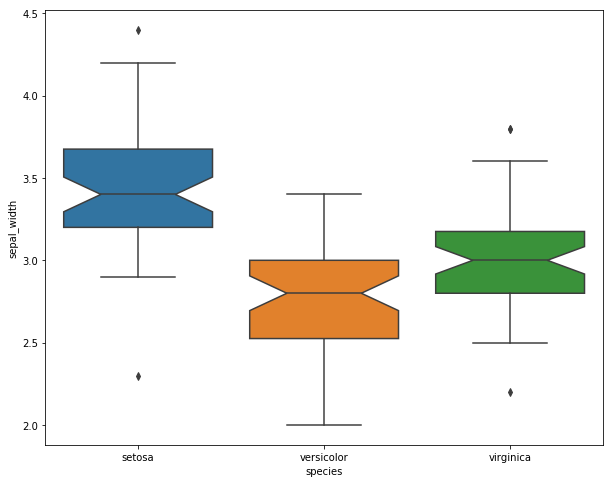

In [10]:
df = sns.load_dataset('iris')
f, axes = plt.subplots(figsize = (10,8))
sns.boxplot( x=df["species"], y=df["sepal_width"], notch=True)

Let's go back to the *redwines* data, and plot the alcohol content for all qualities of wine

In [11]:
dframe_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_so2', 'total_so2', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

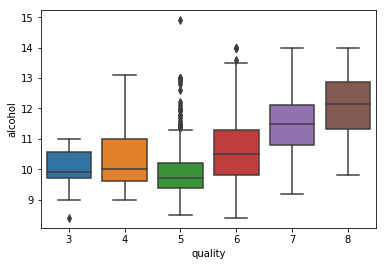

In [12]:
sns.boxplot( x=dframe_wine["quality"], y=dframe_wine["alcohol"])

When we have a lot of categories on the x-axis, we might want to make the boxes narrower:

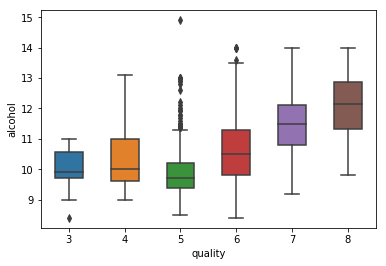

In [13]:
sns.boxplot( x=dframe_wine["quality"], y=dframe_wine["alcohol"], width = 0.5)

### Violin plots

Let's create an example where a box plot doesn't give the whole picture

In [14]:
from scipy import stats

# A normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated, with the second one inverted
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

First let's look at boxplots of the two distributions

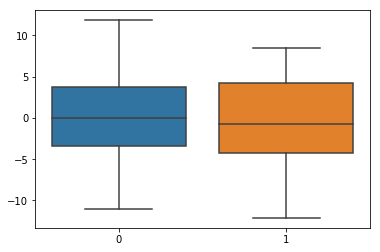

In [15]:
sns.boxplot(data=[data1,data2],whis=np.inf)

Based on the boxplot, both distributions look similar, though they differ quite a bit if we look at their KDE plots:

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


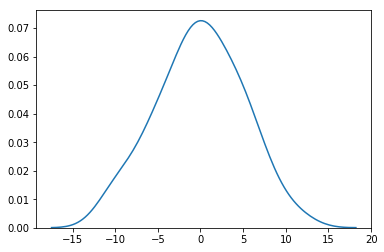

In [16]:
sns.kdeplot(data1)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


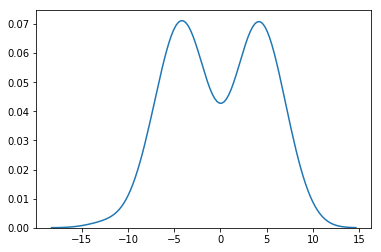

In [17]:
sns.kdeplot(data2)

Violin plot overcomes this limitation of the boxplot

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


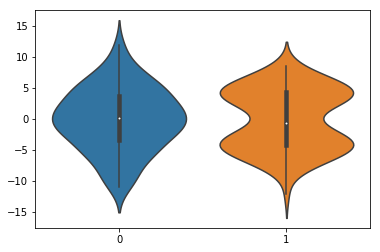

In [18]:
sns.violinplot(data = [data1,data2])

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


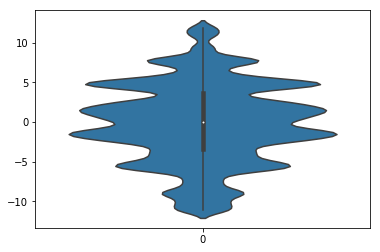

In [19]:
sns.violinplot(data = data1,bw=0.1) # manually setting bandwidth - in this case very small, so a very sensitive KDE plot

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


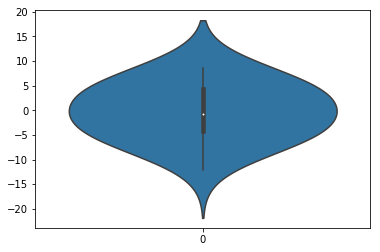

In [20]:
sns.violinplot(data = data2,bw=1) # this time with a large bandwidth

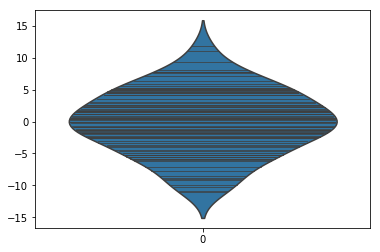

In [21]:
sns.violinplot(data = data1,inner = 'stick') # show individual data points as 'sticks'

Again, let's do one with the *iris* data. In this exmple, we'll choose a palette, so that the colours used come from this collection of colours

In [22]:
df = sns.load_dataset('iris')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


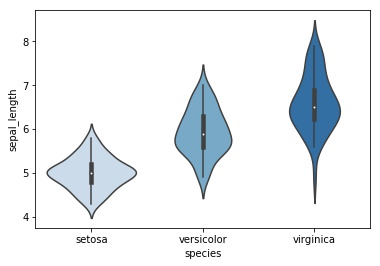

In [23]:
sns.violinplot( x = df["species"], y = df["sepal_length"], palette = "Blues")

Of course, we can control what colour we want each group to be. We can specify our own palette as a dictionary:

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


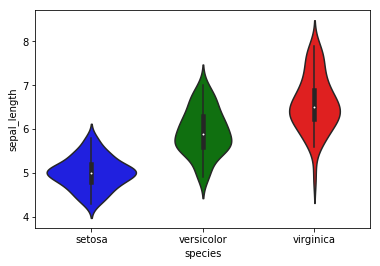

In [24]:
my_palette = {"versicolor": "green", "setosa": "blue", "virginica":"red"}
sns.violinplot( x = df["species"], y = df["sepal_length"], palette = my_palette)

# End of part 11